## Module 1: Map Projections

A **map projection** is a transformation of latitudes and longitudes of locations from the surface of a sphere or an ellipsoid into locations on a plane. Maps cannot be created without map projections, and all projections distort the surface in some fashion. Different projections create different distortions and you choose your projection based on the purpose of the map. Angles, areas, directions, shapes and distances become distorted when transformed from a curved surface to a plane. 
All these properties cannot be kept undistorted in a single projection. Usually the distortion in one property will be kept to a minimum while other properties become very distorted. 

Let’s think about it another way, imagine you have an orange and you drew a breathtaking self-portrait on it. However, you are hungry so you peel the orange. Now with such a masterpiece you want decide to try and lay the orange peels out on a table to recreate your portrait. You soon get frustrate and realize that no matter how you lay the peels out on the table that the portrait will be distorted. The same thing is true when you create maps, we are taking a spherical shaped object and flattening it.

A **basemap** is the 'background layer' or 'canvas' of your map. The function of the basemap is to provide background detail necessary to help orient the user to the location of the map. Basemaps also add to the aesthetic appeal of a map.

In this lab you will learn about different map projections as well as how to display basemaps within python using the a basemaps library.

Let’s start off with loading the libraries we will be using. The only new library is Basemap, you can read more about it [here]( https://matplotlib.org/basemap/)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

Now for our first map! 

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

This globe is not only an image but is a fully functioning Matplotlib axes that understands spherical coordinates and allows easily overplot data on the map! 


For example, we can use a different map projection, zoom-in to North America and plot the location of Columbia, Missouri.

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-92.34, 38.95)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Columbia, MO', fontsize=12);

As you can see with just a few lines of python you can display a map in different orientations with data!! 

## Drawing world map
Before we get into the projections, here is a quick function that will be used to draw world maps along with the longitude and latitude lines for our maps.

In [ ]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

# Map Projection
A map projection is a system in which locations on the curved surface of the earth are displayed on a flat sheet or surface according to some set of rules Mathematically, projection is a process of transforming a global location (j,l) to a planar position (x,y). Generally speaking, a map projection is any method of "flattening" a continuous curved surface onto a plane. This flattening is done for many reasons: cheap, easy to display & store, accommodate range of scales, facilitate measuring properties, etc.

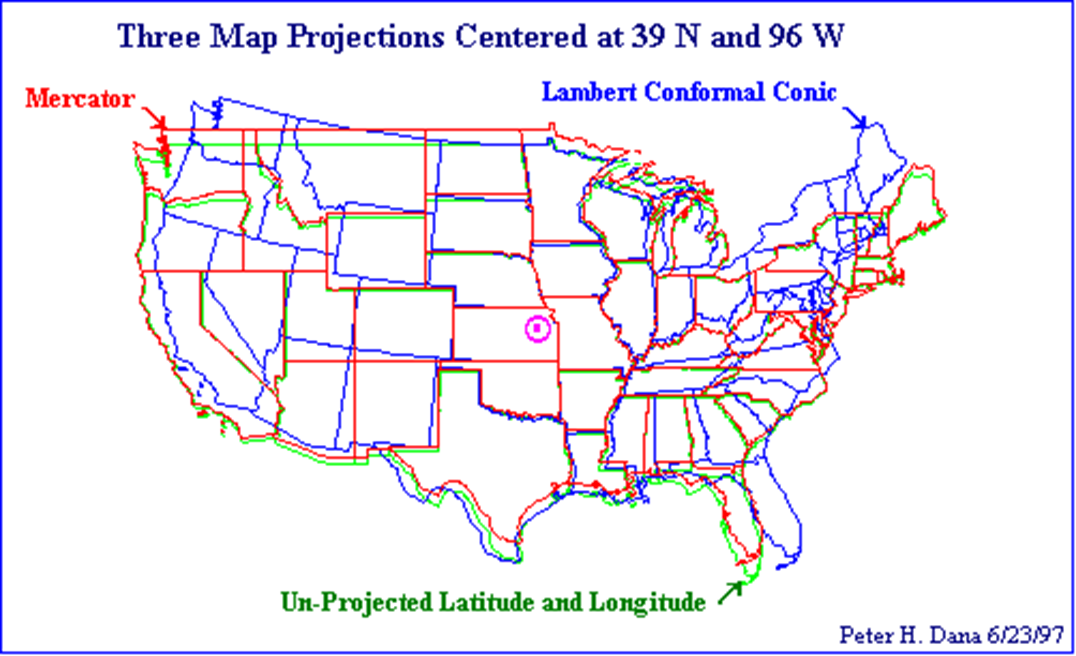

A map projection is a transformation of the latitudes and longitudes of locations from the surface of a sphere or an ellipsoid into locations on a plane. All projections distort the surface in some fashion. Angles, areas, directions, shapes and distances become distorted when transformed from a curved surface to a plane. 
Again, all these properties cannot be kept undistorted in a single projection. Usually the distortion in one property will be kept to a minimum while other properties become very distorted!

Therefore different map projections exist, allowing the map creator the ability to choose the projection that works best for the intended use of the map.


## Distortion
(from Wikipedia)

The classical way of showing the distortion inherent in a projection is to use Tissot's indicatrix. For a given point, using the scale factor h along the meridian, the scale factor k along the parallel, and the angle θ′ between them, Nicolas Tissot described how to construct an ellipse that characterizes the amount and orientation of the components of distortion. By spacing the ellipses regularly along the meridians and parallels, the network of indicatrices shows how distortion varies across the map.
![Tissot's Indicatrices on the Mercator projection - By Stefan Kühn - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=24628](../images/Tissot_mercator.png)

## Projection Considerations

When considering what projection to use, the purpose of the map will be your guide with two main considerations to keep in mind: 1) The projections compatibility with the data to be displayed, and 2) The preserved, compromised, and approximated properties of the projection. 

Below we will briefly examine some of the most popular types of projections.

## Cylindrical projections
The simplest are cylindrical projections, in which lines of constant latitude and longitude are mapped to horizontal and vertical lines, respectively. This type of mapping represents equatorial regions quite well, but results in extreme distortions near the poles. The spacing of latitude lines varies between different cylindrical projections, leading to different conservation properties, and different distortion near the poles. 

Some cylindrical projections are: the equidistant cylindrical projection (projection="cyl"), the Mercator (projection='merc') and the cylindrical equal area (projection='cea') projection.


In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

The additional arguments to Basemap for this view specify the latitude (lat) and longitude (lon) of the lower-left corner (llcrnr) and upper-right corner (urcrnr) for the desired map, in units of degrees. 

In the above example we use -90, 90 and 180, -180 to capture the entire globe. 

## Pseudo-cylindrical projections
Pseudo-cylindrical projections relax the requirement that meridians (lines of constant longitude) remain vertical; this can give better properties near the poles of the projection. The Mollweide projection (projection='moll') is one common example of this, in which all meridians are elliptical arcs. It is constructed so as to preserve area across the map: though there are distortions near the poles, the area of small patches reflects the true area. Other examples of pseudo-cylindrical projections are the sinusoidal (projection='sinu') and Robinson (projection='robin') projections.

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

The extra arguments to Basemap here refer to the central latitude (lat_0) and longitude (lon_0) for the desired map. Which we have set to 0,0, which is known as [Null Island](https://en.wikipedia.org/wiki/Null_Island)

## Perspective projections
Perspective projections are constructed using a particular choice of perspective point. An example is the orthographic projection (projection='ortho'). This projection can only show half the globe at a time. Other perspective-based projections include the gnomonic projection (projection='gnom') and stereographic projection (projection='stere').

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

## Conic projections
A Conic projection projects the map onto a single cone, which is then unrolled. This can lead to very good local properties, but regions far from the focus point of the cone may become very distorted. One example of this is the Lambert Conformal Conic projection (projection='lcc'), It projects the map onto a cone arranged in such a way that two standard parallels (specified in Basemap by lat_1 and lat_2) have well-represented distances, with scale decreasing between them and increasing outside of them. Other useful conic projections are the equidistant conic projection (projection='eqdc') and the Albers equal-area projection (projection='aea'). Conic projections, like perspective projections, tend to be good choices for representing small to medium patches of the globe.

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

## Conclusion
This lab covered:
* Displaying maps within python using the basemaps library
* The most common types of map projections